In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import time
import datetime
from datetime import timedelta
import scipy.stats as stats

In [2]:
ID_13_2020=pd.read_csv(r'//srv-mla/MLA_ADP2022/Tags_2020\TagID_013_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_14_2020=pd.read_csv(r'//srv-mla/MLA_ADP2022/Tags_2020\TagID_014_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_85_2020=pd.read_csv(r'//srv-mla/MLA_ADP2022/Tags_2020\TagID_085_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_52_2020=pd.read_csv(r'//srv-mla/MLA_ADP2022/Tags_2020\TagID_052_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [ ]:
def get_index(data):
    data['TagValue_1']=data.CreateDateTime.diff(1).dt.total_seconds()
    data['TagValue_2']=data.TagValue.diff(1)
    data['TagValue_2'] = data.TagValue_2.map(lambda x:float(x))
    data_da=data[(data['TagValue_1']>86400)&(data['TagValue_2']>-1)]
    data_da1=data_da[data_da['TagValue'] == data_da['TagValue_2'] ]
    return data_da1

In [5]:
def get_index(data):
    data['TagValue_1']=data.CreateDateTime.diff(1).dt.total_seconds()
    data_da=data[data['TagValue_1']>172800]
#     data['TagValue_2']=data.TagValue.diff(1)
#     data['TagValue_2'] = data.TagValue_2.map(lambda x:float(x))
#     data_da=data[(data['TagValue_1']>86400)&(data['TagValue_2']>-1)]
#     data_da1=data_da[data_da['TagValue'] == data_da['TagValue_2'] ]
    return data_da

In [6]:
get_index(ID_13_2020)

,CreateDateTime,TagValue,TagId,TagValue_1
1563,2020-02-25 18:23:45.826,1.0,13,436875.588
2956,2020-03-23 07:14:56.304,1.0,13,1391944.201
4086,2020-04-28 14:24:15.771,0.0,13,2212021.386
4412,2020-05-04 08:58:08.906,1.0,13,206463.953
4514,2020-05-11 12:50:15.041,1.0,13,410986.059
4725,2020-06-22 14:07:45.977,0.0,13,3243675.167
6042,2020-07-20 10:25:39.723,0.0,13,1343354.433
6043,2020-07-23 14:10:11.550,0.0,13,272671.827
6048,2020-07-27 08:27:52.284,1.0,13,319514.940
10789,2020-09-21 09:35:13.066,0.0,13,780991.333


In [7]:
get_index(ID_85_2020)

,CreateDateTime,TagValue,TagId,TagValue_1
2133,2020-02-25 06:11:49.223,1.0,85,386516.863
4077,2020-03-23 07:14:56.304,0.0,85,1391881.440
5536,2020-04-28 14:24:15.728,1.0,85,2211774.679
6003,2020-05-04 07:27:51.136,1.0,85,199823.515
6189,2020-05-11 10:15:40.243,1.0,85,391183.514
6523,2020-06-22 14:07:45.975,1.0,85,3243615.350
8192,2020-07-20 10:25:39.718,0.0,85,1343210.994
8193,2020-07-23 14:10:11.548,0.0,85,272671.830
8194,2020-07-27 07:23:46.866,1.0,85,321215.318
14091,2020-09-21 09:35:13.062,0.0,85,780932.676


In [39]:
def new_base(data1,data2):
    for i in range(0,len(get_index(data1))):
        a = get_index(data1).reset_index().loc[i]['CreateDateTime']
        b = data1.loc[get_index(data1).reset_index().loc[i]['index']-1]['CreateDateTime']
        data2=data2[(data2['CreateDateTime']>a)|(data2['CreateDateTime']<b)]
    return data2

In [40]:
df = ID_52_2020

In [42]:
base = new_base(ID_85_2020,df)

In [43]:
ID_52_13_2020 = base.set_index('CreateDateTime').join(ID_13_2020.set_index('CreateDateTime'),lsuffix = '_52', rsuffix = '_13',how = 'outer')
#ID_58_141_2018 = ID_58_141_2018.interpolate()
ID_52_13_2020 = ID_52_13_2020.fillna(method = "ffill")
ID_52_13_2020

,TagValue_52,TagId_52,TagValue_13,TagId_13,TagValue_1
CreateDateTime,,,,,
2020-02-06 13:05:56.982,2.575232,52.0,0.0,13.0,NaN
2020-02-06 13:05:58.643,2.517361,52.0,0.0,13.0,NaN
2020-02-06 13:05:59.049,2.575232,52.0,0.0,13.0,NaN
2020-02-06 13:06:00.073,2.604167,52.0,0.0,13.0,NaN
2020-02-06 13:06:00.277,2.575232,52.0,0.0,13.0,NaN
...,...,...,...,...,...
2020-12-31 23:08:28.691,1.591435,52.0,0.0,13.0,15.965
2020-12-31 23:23:26.096,1.620370,52.0,0.0,13.0,15.965
2020-12-31 23:23:26.307,1.591435,52.0,0.0,13.0,15.965


In [44]:
ID_13_2020_resample = ID_52_13_2020.drop('TagValue_52',axis = 1) 
ID_13_2020_resample = ID_13_2020_resample.drop('TagId_52',axis = 1) 
ID_13_2020_resample

,TagValue_13,TagId_13,TagValue_1
CreateDateTime,,,
2020-02-06 13:05:56.982,0.0,13.0,NaN
2020-02-06 13:05:58.643,0.0,13.0,NaN
2020-02-06 13:05:59.049,0.0,13.0,NaN
2020-02-06 13:06:00.073,0.0,13.0,NaN
2020-02-06 13:06:00.277,0.0,13.0,NaN
...,...,...,...
2020-12-31 23:08:28.691,0.0,13.0,15.965
2020-12-31 23:23:26.096,0.0,13.0,15.965
2020-12-31 23:23:26.307,0.0,13.0,15.965


In [45]:
ID_52_85_2020 = base.set_index('CreateDateTime').join(ID_85_2020.set_index('CreateDateTime'),lsuffix = '_52', rsuffix = '_85',how = 'outer')
#ID_58_141_2018 = ID_58_141_2018.interpolate()
ID_52_85_2020 = ID_52_85_2020.fillna(method = "ffill")
ID_52_85_2020

,TagValue_52,TagId_52,TagValue_85,TagId_85,TagValue_1
CreateDateTime,,,,,
2020-02-06 13:05:56.982,2.575232,52.0,0.0,85.0,NaN
2020-02-06 13:05:58.643,2.517361,52.0,0.0,85.0,NaN
2020-02-06 13:05:59.049,2.575232,52.0,0.0,85.0,NaN
2020-02-06 13:06:00.073,2.604167,52.0,0.0,85.0,NaN
2020-02-06 13:06:00.277,2.575232,52.0,0.0,85.0,NaN
...,...,...,...,...,...
2020-12-31 23:08:28.691,1.591435,52.0,0.0,85.0,681.125
2020-12-31 23:23:26.096,1.620370,52.0,0.0,85.0,681.125
2020-12-31 23:23:26.307,1.591435,52.0,0.0,85.0,681.125


In [47]:
ID_85_2020_resample = ID_52_85_2020.drop('TagValue_52',axis = 1) 
ID_85_2020_resample = ID_85_2020_resample.drop('TagId_52',axis = 1) 
ID_85_2020_resample

,TagValue_85,TagId_85,TagValue_1
CreateDateTime,,,
2020-02-06 13:05:56.982,0.0,85.0,NaN
2020-02-06 13:05:58.643,0.0,85.0,NaN
2020-02-06 13:05:59.049,0.0,85.0,NaN
2020-02-06 13:06:00.073,0.0,85.0,NaN
2020-02-06 13:06:00.277,0.0,85.0,NaN
...,...,...,...
2020-12-31 23:08:28.691,0.0,85.0,681.125
2020-12-31 23:23:26.096,0.0,85.0,681.125
2020-12-31 23:23:26.307,0.0,85.0,681.125


In [48]:
ID_13_85_2020=ID_13_2020_resample.join(ID_85_2020_resample,lsuffix='_13', rsuffix='_85',how='outer')
#ID_58_141_2018=ID_58_141_2018.interpolate()
ID_13_85_2020=ID_13_85_2020.fillna(method="ffill")
ID_13_85_2020

,TagValue_13,TagId_13,TagValue_1_13,TagValue_85,TagId_85,TagValue_1_85
CreateDateTime,,,,,,
2020-02-06 13:05:56.982,0.0,13.0,NaN,0.0,85.0,NaN
2020-02-06 13:05:58.643,0.0,13.0,NaN,0.0,85.0,NaN
2020-02-06 13:05:59.049,0.0,13.0,NaN,0.0,85.0,NaN
2020-02-06 13:06:00.073,0.0,13.0,NaN,0.0,85.0,NaN
2020-02-06 13:06:00.277,0.0,13.0,NaN,0.0,85.0,NaN
...,...,...,...,...,...,...
2020-12-31 23:08:28.691,0.0,13.0,15.965,0.0,85.0,681.125
2020-12-31 23:23:26.096,0.0,13.0,15.965,0.0,85.0,681.125
2020-12-31 23:23:26.307,0.0,13.0,15.965,0.0,85.0,681.125


Pandas computed Pearson r: -0.7179593289444173
Scipy computed Pearson r: -0.7179597722341894 and p-value: 0.0


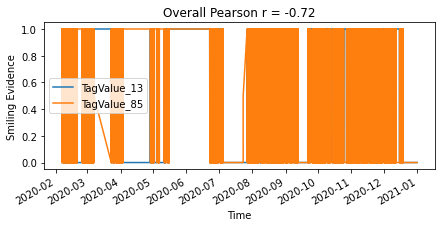

In [50]:
df = ID_13_85_2020 
overall_pearson_r = df.corr().iloc[0,3]
print(f"Pandas computed Pearson r: {overall_pearson_r}")


r, p = stats.pearsonr(df.dropna()['TagValue_13'], df.dropna()['TagValue_85'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")


df2=df[['TagValue_13','TagValue_85']]
f,ax=plt.subplots(figsize=(7,3))
df2.rolling(window=150,center=True).median().plot(ax=ax)
ax.set(xlabel='Time',ylabel='Smiling Evidence')
ax.set(title=f"Overall Pearson r = {np.round(overall_pearson_r,2)}")
plt.show()